In [1]:
import random

import pandas

from curve_fits import Call

from curve_fits import frames

In [2]:
def random_ints_array(size, max_abs=100):
    return random.choices(range(-max_abs, max_abs), k=size)

In [4]:
size_range = range(1500, 2500)
profile = frames.TimeComplexityProfile(
    [Call('list', random_ints_array(size)) for size in size_range],
    Call('pop'), Call('copy'),
    index=pandas.Index(size_range, name='List length'), loops=100, overfit=-6, fraction=0.9)

In [5]:
profile.fit_all_with(Call('polynomial', 1, 2))

In [6]:
profile.best_fits()

kind                                                fit DOF
key  cost                                                                    
pop  0.001765  Poly(1)        (-0.0136 ± 0.0018) + (0.00002406 ± 8.8E-7)x   1
     0.002108  Poly(2)  (-0.080 ± 0.013) + (0.000093 ± 0.000013)x + (-...   2
copy 0.004712  Poly(1)      (-0.00745 ± 0.00076) + (0.00002142 ± 3.7E-7)x   1
     0.005553  Poly(2)  (-0.0121 ± 0.0057) + (0.0000261 ± 0.0000058)x ...   2

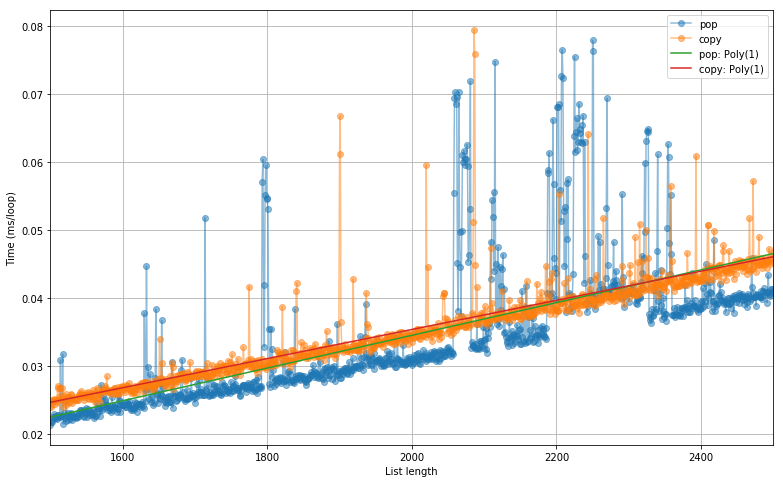

In [7]:
profile.plot(limit=1)

In [8]:
[fit.measures for fit in profile.best_fits(1).fit]

[(<Measure: -0.0136 ± 0.0018>, <Measure: 0.00002406 ± 8.8E-7>),
 (<Measure: -0.00745 ± 0.00076>, <Measure: 0.00002142 ± 3.7E-7>)]

In [9]:
assert not list(filter(
    lambda v: v and v > 10**(-8), (len(fit.measures) == 3 and fit.measures[2].value for fit in profile.best_fits(1).fit)
)), 'Unexpected 2nd degree'